# preprocessing - machine learning modeling


###  김하연

In [146]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 40)

In [147]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [148]:
df= pd.read_csv('df_bus_100100073_weather.csv')

In [149]:
df.head()

,Unnamed: 0,baseDateMinute,plainNo,fullSectDist,gpsX,gpsY,sectionId,stopFlag,congetion,busRouteId,seq,station_x,stationNm_x,nx_x,ny_x,station_y,stationNm_y,nx_y,ny_y,preStation_x,preSeq,prePlainNo,preBaseDateTime,seqDiff,nextBaseDateTime,nextPlainNo,baseDateHour,interval,nx,ny,PTY,REH,RN1,T1H,UUU,VEC,VVV,WSD
0,0,202108101042,서울70사6587,0.619,126.904464,37.575563,112602628,1,3,100100073,12,112000001,북가좌동삼거리,59,127,112000003,DMC래미안e.편한세상요진아파트,59,127,111000007,11.0,서울70사6587,202108101041,1.0,202108101044,서울70사6587,2021081010,2,59,127,0,62,0.0,28.9,-0.4,153,1.0,1.1
1,1,202108101044,서울70사6587,0.561,126.909702,37.571645,112602629,0,3,100100073,13,112000003,DMC래미안e.편한세상요진아파트,59,127,112000005,모래내시장.가좌역,59,127,112000001,12.0,서울70사6587,202108101042,1.0,202108101046,서울70사6587,2021081010,2,59,127,0,62,0.0,28.9,-0.4,153,1.0,1.1
2,2,202108101046,서울70사6587,0.324,126.914576,37.569268,112602300,1,3,100100073,14,112000005,모래내시장.가좌역,59,127,112000007,사천교,59,127,112000003,13.0,서울70사6587,202108101044,1.0,202108101048,서울70사6587,2021081010,2,59,127,0,62,0.0,28.9,-0.4,153,1.0,1.1
3,3,202108101048,서울70사6587,0.634,126.917966,37.567651,112603411,1,3,100100073,15,112000007,사천교,59,127,112000008,연희104고지앞.구성산회관,59,127,112000005,14.0,서울70사6587,202108101046,1.0,202108101051,서울70사6587,2021081010,3,59,127,0,62,0.0,28.9,-0.4,153,1.0,1.1
4,4,202108101051,서울70사6587,0.825,126.925254,37.566290,112602251,1,3,100100073,16,112000008,연희104고지앞.구성산회관,59,127,112000010,서대문우체국,59,127,112000007,15.0,서울70사6587,202108101048,1.0,202108101053,서울70사6587,2021081010,2,59,127,0,62,0.0,28.9,-0.4,153,1.0,1.1


In [150]:
from_gangnam = ['뱅뱅사거리', '래미안아파트.파이낸셜뉴스', '신분당선강남역', '지하철2호선강남역', '논현역', '신사역', '한남대교전망카페', '한남5거리', '순천향대학병원', '서울백병원.국가인권위.안중근활동터']
to_gangnam = ['남대문세무서.서울백병원', '남산1호터널', '순천향대학병원.한남오거리', '신사역.푸른저축은행', '논현역', '지하철2호선강남역', '신분당선강남역', '래미안아파트.파이낸셜뉴스', '뱅뱅사거리']

df=df[df['stationNm_x'].isin(from_gangnam+to_gangnam)
  ]

## Original DataFrame

In [151]:
# df.columns

In [152]:
# df=df[['baseDateMinute', 'fullSectDist', 'gpsX',
#        'gpsY', 'sectionId', 'stopFlag', 'congetion', 'busRouteId', 'seq',
#        'station_x', 'nx_x', 'ny_x', 'station_y', 
#        'nx_y', 'ny_y', 'nextBaseDateTime',
#        'interval', 'baseDateHour', 'nx', 'ny', 'PTY', 'REH', 'RN1', 'T1H',
#        'UUU', 'VEC', 'VVV', 'WSD']]
df = df[['baseDateMinute','sectionId','PTY','REH','RN1','T1H','UUU','VEC','VVV','WSD', 'interval', 'congetion', 'gpsX', 'gpsY',]]

In [153]:
df

,baseDateMinute,sectionId,PTY,REH,RN1,T1H,UUU,VEC,VVV,WSD,interval,congetion,gpsX,gpsY
126,202108101118,101604636,0,60,0.0,29.7,1.6,207,3.2,3.6,3,4,126.987530,37.564985
127,202108101121,102603021,0,60,0.0,29.7,1.6,207,3.2,3.6,4,4,126.992849,37.555661
128,202108101133,101600424,0,60,0.0,29.7,1.6,207,3.2,3.6,3,3,126.987851,37.564372
145,202108101151,101604636,0,60,0.0,29.7,1.6,207,3.2,3.6,2,3,126.987465,37.564964
146,202108101153,102603021,0,60,0.0,29.7,1.6,207,3.2,3.6,4,3,126.992493,37.556479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26016,202108110846,121607076,0,78,0.0,25.9,-0.1,5,-2.0,2.1,5,3,127.020747,37.512647
26017,202108110858,121600010,0,78,0.0,25.9,-0.1,5,-2.0,2.1,4,4,127.019981,37.514205
26125,202108120856,102602969,0,68,0.0,27.5,-1.5,51,-1.2,2.1,3,4,127.007987,37.533173
26126,202108120859,101604644,0,68,0.0,27.5,-1.5,51,-1.2,2.1,5,4,127.005730,37.536442


In [154]:
df['baseDateMinute']=df['baseDateMinute'].astype(str)

In [155]:
# df['baseDateMinute']=
df['baseDateMinute']=df['baseDateMinute'].str[-4:]

In [156]:
df['baseDateMinute']= df['baseDateMinute'].astype(int)

In [157]:
# df.drop({'Unnamed: 0'},axis=1,inplace=True)

In [158]:
df_y= df['interval']

In [159]:
df_X = df.drop({'interval'},axis=1)

In [160]:
df_X.head()

,baseDateMinute,sectionId,PTY,REH,RN1,T1H,UUU,VEC,VVV,WSD,congetion,gpsX,gpsY
126,1118,101604636,0,60,0.0,29.7,1.6,207,3.2,3.6,4,126.987530,37.564985
127,1121,102603021,0,60,0.0,29.7,1.6,207,3.2,3.6,4,126.992849,37.555661
128,1133,101600424,0,60,0.0,29.7,1.6,207,3.2,3.6,3,126.987851,37.564372
145,1151,101604636,0,60,0.0,29.7,1.6,207,3.2,3.6,3,126.987465,37.564964
146,1153,102603021,0,60,0.0,29.7,1.6,207,3.2,3.6,3,126.992493,37.556479


In [161]:
# pd.set_option('display.max_columns', None)

In [162]:
df_y.value_counts()

3     2513
2     1555
4     1204
5      554
1      342
6      275
7      132
9       72
8       72
10      58
11      25
12      15
13       7
0        7
15       3
14       3
Name: interval, dtype: int64

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6837 entries, 126 to 26127
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   baseDateMinute  6837 non-null   int32  
 1   sectionId       6837 non-null   int64  
 2   PTY             6837 non-null   int64  
 3   REH             6837 non-null   int64  
 4   RN1             6837 non-null   float64
 5   T1H             6837 non-null   float64
 6   UUU             6837 non-null   float64
 7   VEC             6837 non-null   int64  
 8   VVV             6837 non-null   float64
 9   WSD             6837 non-null   float64
 10  interval        6837 non-null   int64  
 11  congetion       6837 non-null   int64  
 12  gpsX            6837 non-null   float64
 13  gpsY            6837 non-null   float64
dtypes: float64(7), int32(1), int64(6)
memory usage: 774.5 KB


In [164]:
# df_X

# RandomForestRegressor ver.

In [165]:
train_X, val_X, train_y, val_y = train_test_split(df_X, df_y, random_state=1)


rf_model = RandomForestRegressor(random_state = 1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {:,.4f}".format(rf_val_mae))

Validation MAE for Random Forest Model: 0.6670


## 예측값과 실제값이 다른 top 15

In [166]:
def get_top_error_data(y_test, pred, n_tops = 5):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교 할 수 있도록 생성. 
    result_df = pd.DataFrame(val_y.values, columns=['real_count'])
    result_df['predicted_count']= np.round(rf_val_predictions)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력. 
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(val_y,rf_val_predictions,n_tops=30)

      real_count  predicted_count  diff
1212           5              9.0   4.0
653           15             11.0   4.0
1675          11              7.0   4.0
281            0              3.0   3.0
174           11              8.0   3.0
757           10              7.0   3.0
1060          10              7.0   3.0
745            2              5.0   3.0
524           10              7.0   3.0
366           10              7.0   3.0
593            5              2.0   3.0
1399           2              5.0   3.0
676            1              4.0   3.0
1561           9              6.0   3.0
173            2              5.0   3.0
936           10              7.0   3.0
923            9              6.0   3.0
1445           7             10.0   3.0
1167           7             10.0   3.0
1201           2              4.0   2.0
1217           4              2.0   2.0
293            5              3.0   2.0
291            5              7.0   2.0
1207           5              3.0   2.0


## LinearRegression .ver

In [167]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso


X_train, X_test, y_train, y_test = train_test_split(df_X , df_y, test_size=0.3, random_state=1)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test ,pred)

RMSLE: 0.316, RMSE: 1.532, MAE: 1.106


## check

In [168]:
train_X['baseDateMinute'].value_counts()

1636    21
1043    20
1414    19
1139    18
1107    18
        ..
1618     2
1747     1
842      1
849      1
839      1
Name: baseDateMinute, Length: 560, dtype: int64

In [169]:
val_X['baseDateMinute'].value_counts()

1508    10
1646     8
1005     8
1332     8
1652     8
        ..
1638     1
1551     1
1345     1
841      1
1548     1
Name: baseDateMinute, Length: 525, dtype: int64

In [170]:
train_y.value_counts()

3     1880
2     1153
4      893
5      422
1      269
6      210
7      105
8       59
9       51
10      41
11      14
12      12
13       7
0        6
14       3
15       2
Name: interval, dtype: int64

In [171]:
val_y.value_counts()

3     633
2     402
4     311
5     132
1      73
6      65
7      27
9      21
10     17
8      13
11     11
12      3
0       1
15      1
Name: interval, dtype: int64

In [172]:
df_predict = pd.concat([val_X.reset_index(drop=True), val_y.reset_index(drop=True), pd.DataFrame(rf_val_predictions).rename(columns={0:'predict'}).reset_index(drop=True)], axis=1)

In [173]:
df_predict

,baseDateMinute,sectionId,PTY,REH,RN1,T1H,UUU,VEC,VVV,WSD,congetion,gpsX,gpsY,interval,predict
0,1528,121600088,0,53,0.0,31.4,0.9,225,0.9,1.3,3,127.005729,37.535491,9,9.52
1,1229,121607076,0,49,0.0,31.4,1.0,222,1.1,1.5,3,127.020716,37.512737,4,4.75
2,1602,121607970,0,58,0.0,30.9,0.3,197,1.0,1.0,3,127.029202,37.494890,2,2.51
3,1051,121607992,0,49,0.0,28.7,-1.6,83,-0.1,1.7,3,127.025688,37.501707,3,3.50
4,1040,122600078,0,59,0.0,27.4,-1.2,99,0.2,1.3,3,127.028404,37.495925,3,3.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705,1144,121600012,0,58,0.0,30.3,0.4,202,1.0,1.1,3,127.023862,37.505791,3,2.88
1706,1612,121608025,0,53,0.0,29.0,-1.8,78,-0.3,1.9,3,127.032432,37.487667,2,3.86
1707,1215,101604636,0,66,0.0,28.4,-1.7,52,-1.3,2.3,3,126.987639,37.564589,2,2.09
1708,1038,121607964,0,60,0.0,30.1,-0.3,153,0.8,0.9,3,127.030298,37.492581,3,2.62


In [174]:
df_predict[df_predict['sectionId']==121607972]

,baseDateMinute,sectionId,PTY,REH,RN1,T1H,UUU,VEC,VVV,WSD,congetion,gpsX,gpsY,interval,predict
5,1437,121607972,1,61,0.0,30.2,0.5,207,1.0,1.1,3,127.026587,37.500413,4,3.25
12,1152,121607972,0,49,0.0,29.2,0.0,3,-2.1,2.2,3,127.026311,37.501001,3,2.64
15,1136,121607972,0,69,0.0,28.1,-1.0,110,0.4,1.2,3,127.026370,37.500785,3,2.78
21,1016,121607972,0,49,0.0,28.7,-1.6,83,-0.1,1.7,3,127.026370,37.500785,3,3.03
46,1446,121607972,1,61,0.0,30.2,0.5,207,1.0,1.1,3,127.026388,37.500836,3,2.75
55,1646,121607972,0,48,0.0,31.9,0.5,196,1.7,1.8,3,127.026490,37.500620,3,2.85
67,1655,121607972,0,58,0.0,30.9,0.3,197,1.0,1.0,3,127.026478,37.500646,2,3.56
85,1414,121607972,1,61,0.0,30.2,0.5,207,1.0,1.1,3,127.026562,37.500466,3,3.24
123,1516,121607972,0,45,0.0,31.9,-0.5,159,1.6,1.7,3,127.026408,37.500795,2,2.91
136,1256,121607972,0,65,0.0,28.5,-1.0,90,0.0,1.1,3,127.026502,37.500594,5,2.59


In [175]:
df_predict[(df_predict['sectionId']==121607972)&(df_predict['baseDateMinute'] > 900)&(df_predict['baseDateMinute'] < 1000)]

,baseDateMinute,sectionId,PTY,REH,RN1,T1H,UUU,VEC,VVV,WSD,congetion,gpsX,gpsY,interval,predict
229,944,121607972,0,62,0.0,26.2,-1.4,68,-0.5,1.6,3,127.026635,37.500312,3,2.39
464,905,121607972,0,64,0.0,29.6,0.6,209,1.1,1.3,3,127.026375,37.500864,3,2.84
931,929,121607972,0,52,0.0,27.9,-1.7,119,1.0,2.1,3,127.026492,37.500615,3,2.70
1036,953,121607972,0,57,0.0,30.5,0.7,210,1.2,1.4,3,127.026484,37.500632,3,3.10
1116,928,121607972,0,64,0.0,29.6,0.6,209,1.1,1.3,3,127.026473,37.500655,3,3.09
1292,912,121607972,0,64,0.0,29.6,0.6,209,1.1,1.3,3,127.026370,37.500785,3,3.12
1529,958,121607972,0,56,0.0,28.1,-1.5,129,1.3,2.1,3,127.026123,37.501398,2,2.08
1702,948,121607972,0,72,0.0,27.8,-1.7,99,0.3,1.8,3,127.026410,37.500790,2,2.91


In [176]:
# rf_train_predictions = rf_model.predict(train_X)
# df_predict_train = pd.concat([train_X.reset_index(drop=True), train_y.reset_index(drop=True), pd.DataFrame(rf_train_predictions).rename(columns={0:'predict'}).reset_index(drop=True)], axis=1)
# df_predict_train[(df_predict_train['sectionId']==121607972)&(df_predict_train['baseDateMinute'] > 900)&(df_predict_train['baseDateMinute'] < 1000)]

In [177]:
# df_predict[(df_predict['sectionId']==121607972)].sort_values('baseDateMinute')

In [178]:
# df[(df['baseDateMinute']>=900)&(df['baseDateMinute']<1000)]['interval'].value_counts()

In [179]:
# df_predict[(df_predict['baseDateMinute']>=900)&(df_predict['baseDateMinute']<1000)]['predict'].value_counts()

In [180]:
# df_predict[(df_predict['sectionId']==121600088)].sort_values('baseDateMinute')

In [181]:
rf_val_predictions=pd.Series(rf_val_predictions)

In [182]:
# pd.concat([rf_val_predictions,val_y,val_X],axis=1)

# pd.Series(rf_val_predictions)

#  pd.concat([df_0,df_route_st])

In [183]:
len(rf_val_predictions)

1710

In [184]:
val_y.reset_index

<bound method Series.reset_index of 16049    9
2650     4
21092    2
12430    3
8396     3
        ..
350      3
18461    2
16832    2
4246     3
2648     3
Name: interval, Length: 1710, dtype: int64>

In [185]:
val_X.reset_index

<bound method DataFrame.reset_index of        baseDateMinute  sectionId  PTY  REH  RN1   T1H  UUU  VEC  VVV  WSD  \
16049            1528  121600088    0   53  0.0  31.4  0.9  225  0.9  1.3   
2650             1229  121607076    0   49  0.0  31.4  1.0  222  1.1  1.5   
21092            1602  121607970    0   58  0.0  30.9  0.3  197  1.0  1.0   
12430            1051  121607992    0   49  0.0  28.7 -1.6   83 -0.1  1.7   
8396             1040  122600078    0   59  0.0  27.4 -1.2   99  0.2  1.3   
...               ...        ...  ...  ...  ...   ...  ...  ...  ...  ...   
350              1144  121600012    0   58  0.0  30.3  0.4  202  1.0  1.1   
18461            1612  121608025    0   53  0.0  29.0 -1.8   78 -0.3  1.9   
16832            1215  101604636    0   66  0.0  28.4 -1.7   52 -1.3  2.3   
4246             1038  121607964    0   60  0.0  30.1 -0.3  153  0.8  0.9   
2648             1238  121600010    0   49  0.0  31.4  1.0  222  1.1  1.5   

       congetion        gpsX       g

# feature importance

In [186]:
df

# 1. baseDataMinite 60진법으로
# 2. congestion 1,2 (없는값 ) 수정

,baseDateMinute,sectionId,PTY,REH,RN1,T1H,UUU,VEC,VVV,WSD,interval,congetion,gpsX,gpsY
126,1118,101604636,0,60,0.0,29.7,1.6,207,3.2,3.6,3,4,126.987530,37.564985
127,1121,102603021,0,60,0.0,29.7,1.6,207,3.2,3.6,4,4,126.992849,37.555661
128,1133,101600424,0,60,0.0,29.7,1.6,207,3.2,3.6,3,3,126.987851,37.564372
145,1151,101604636,0,60,0.0,29.7,1.6,207,3.2,3.6,2,3,126.987465,37.564964
146,1153,102603021,0,60,0.0,29.7,1.6,207,3.2,3.6,4,3,126.992493,37.556479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26016,846,121607076,0,78,0.0,25.9,-0.1,5,-2.0,2.1,5,3,127.020747,37.512647
26017,858,121600010,0,78,0.0,25.9,-0.1,5,-2.0,2.1,4,4,127.019981,37.514205
26125,856,102602969,0,68,0.0,27.5,-1.5,51,-1.2,2.1,3,4,127.007987,37.533173
26126,859,101604644,0,68,0.0,27.5,-1.5,51,-1.2,2.1,5,4,127.005730,37.536442


<AxesSubplot:>

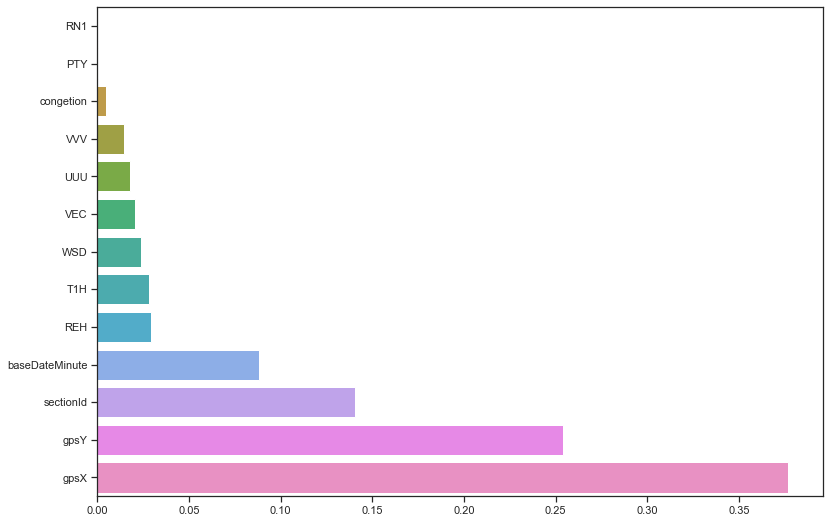

In [187]:
rf_reg = RandomForestRegressor(n_estimators=1000)

rf_reg.fit(df_X,df_y)

feature_series = pd.Series(data=rf_reg.feature_importances_, index = df_X.columns)
feature_series = feature_series.sort_values(ascending=True)
plt.figure(figsize=(13,9))
sns.barplot(x= feature_series, y = feature_series.index)

In [188]:
df

,baseDateMinute,sectionId,PTY,REH,RN1,T1H,UUU,VEC,VVV,WSD,interval,congetion,gpsX,gpsY
126,1118,101604636,0,60,0.0,29.7,1.6,207,3.2,3.6,3,4,126.987530,37.564985
127,1121,102603021,0,60,0.0,29.7,1.6,207,3.2,3.6,4,4,126.992849,37.555661
128,1133,101600424,0,60,0.0,29.7,1.6,207,3.2,3.6,3,3,126.987851,37.564372
145,1151,101604636,0,60,0.0,29.7,1.6,207,3.2,3.6,2,3,126.987465,37.564964
146,1153,102603021,0,60,0.0,29.7,1.6,207,3.2,3.6,4,3,126.992493,37.556479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26016,846,121607076,0,78,0.0,25.9,-0.1,5,-2.0,2.1,5,3,127.020747,37.512647
26017,858,121600010,0,78,0.0,25.9,-0.1,5,-2.0,2.1,4,4,127.019981,37.514205
26125,856,102602969,0,68,0.0,27.5,-1.5,51,-1.2,2.1,3,4,127.007987,37.533173
26126,859,101604644,0,68,0.0,27.5,-1.5,51,-1.2,2.1,5,4,127.005730,37.536442


In [189]:
df['gpsX+gpsY']= df['gpsX']+df['gpsY']

In [190]:
df

,baseDateMinute,sectionId,PTY,REH,RN1,T1H,UUU,VEC,VVV,WSD,interval,congetion,gpsX,gpsY,gpsX+gpsY
126,1118,101604636,0,60,0.0,29.7,1.6,207,3.2,3.6,3,4,126.987530,37.564985,164.552515
127,1121,102603021,0,60,0.0,29.7,1.6,207,3.2,3.6,4,4,126.992849,37.555661,164.548510
128,1133,101600424,0,60,0.0,29.7,1.6,207,3.2,3.6,3,3,126.987851,37.564372,164.552223
145,1151,101604636,0,60,0.0,29.7,1.6,207,3.2,3.6,2,3,126.987465,37.564964,164.552429
146,1153,102603021,0,60,0.0,29.7,1.6,207,3.2,3.6,4,3,126.992493,37.556479,164.548972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26016,846,121607076,0,78,0.0,25.9,-0.1,5,-2.0,2.1,5,3,127.020747,37.512647,164.533394
26017,858,121600010,0,78,0.0,25.9,-0.1,5,-2.0,2.1,4,4,127.019981,37.514205,164.534186
26125,856,102602969,0,68,0.0,27.5,-1.5,51,-1.2,2.1,3,4,127.007987,37.533173,164.541160
26126,859,101604644,0,68,0.0,27.5,-1.5,51,-1.2,2.1,5,4,127.005730,37.536442,164.542172


## 상관관계 분석

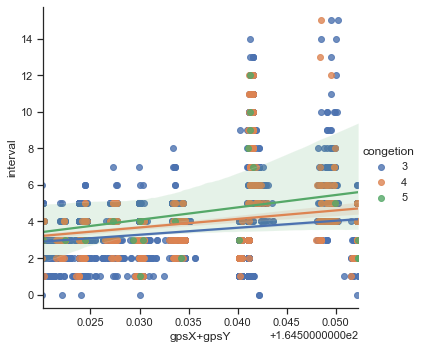

In [191]:

sns.set_theme(style="ticks")


sns.lmplot(
data=df,
    x="gpsX+gpsY", y="interval",
    hue="congetion")



# sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=zoom,
#            col_wrap=2, ci=None, palette="muted", height=4,
#            scatter_kws={"s": 50, "alpha": 1})

In [192]:
df.drop({'gpsX+gpsY'},axis=1,inplace=True)

In [193]:
# df.info()

In [194]:
df_sample=df[['interval','congetion']]

### congetion이 정수라 이렇게 나오는 듯 하다

(6837, 2)


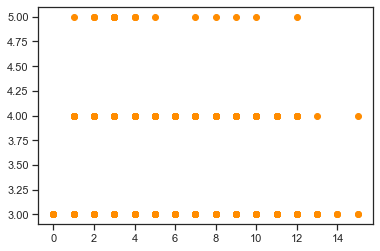

In [195]:
bostonDF_sample = df_sample.sample(n=300,random_state=0)
print(df_sample.shape)
plt.figure()
plt.scatter(df_sample.interval , df_sample.congetion,c="darkorange")

In [196]:

from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환 시 NaN등의 이슈로 log() 가 아닌 log1p() 를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산



def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))



def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MAE 는 scikit learn의 mean_absolute_error() 로 계산
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))


# LinearRegression ver.

In [197]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso


X_train, X_test, y_train, y_test = train_test_split(df_X , df_y, test_size=0.3, random_state=1)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test ,pred)

RMSLE: 0.316, RMSE: 1.532, MAE: 1.106


## 가장 큰 오류값 TOP 10

In [198]:
def get_top_error_data(y_test, pred, n_tops = 5):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교 할 수 있도록 생성. 
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']= np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력. 
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(y_test,pred,n_tops=10)

      real_count  predicted_count  diff
653           15              4.0  11.0
174           11              4.0   7.0
912           12              5.0   7.0
1767          11              5.0   6.0
1467          11              5.0   6.0
1731          11              5.0   6.0
524           10              4.0   6.0
659           11              5.0   6.0
271           11              5.0   6.0
1280          12              6.0   6.0


## 타켓값이 정규분포가 아니다 -> 오류가 증가할 수 있다.

<AxesSubplot:>

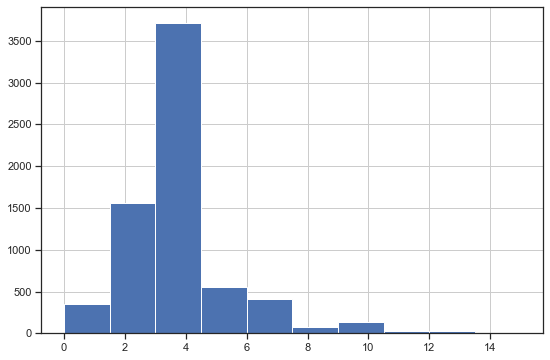

In [199]:
plt.figure(figsize=(9,6))
df_y.hist()

## log1p()를 이용해서 target 값을 정규분포화하고,
## 예측값을 다시 scale 값으로 원상복구하면 된다.

In [200]:
y_log_transform = np.log1p(df_y)

<AxesSubplot:>

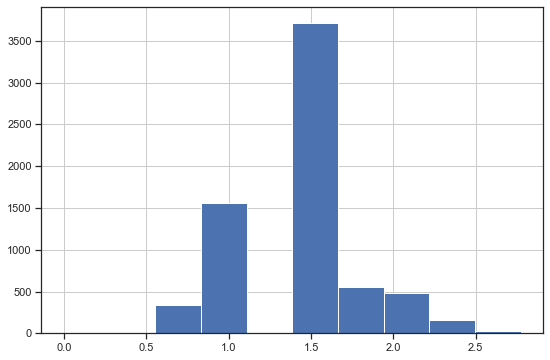

In [201]:
plt.figure(figsize=(9,6))

y_log_transform.hist()

In [202]:
X_train, X_test, y_train, y_test = train_test_split(df_X , y_log_transform, test_size=0.3, random_state=1)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)


y_test_exp = np.expm1(y_test)

pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp ,pred_exp)

RMSLE: 0.306, RMSE: 1.523, MAE: 1.053


## 타겟값 스케일링 후 MAE 1.106  ->1.053 으로 개선

---------------

In [203]:
df_X.columns

Index(['baseDateMinute', 'sectionId', 'PTY', 'REH', 'RN1', 'T1H', 'UUU', 'VEC',
       'VVV', 'WSD', 'congetion', 'gpsX', 'gpsY'],
      dtype='object')

# 각 피쳐의 회귀계수 값 시각화

<AxesSubplot:>

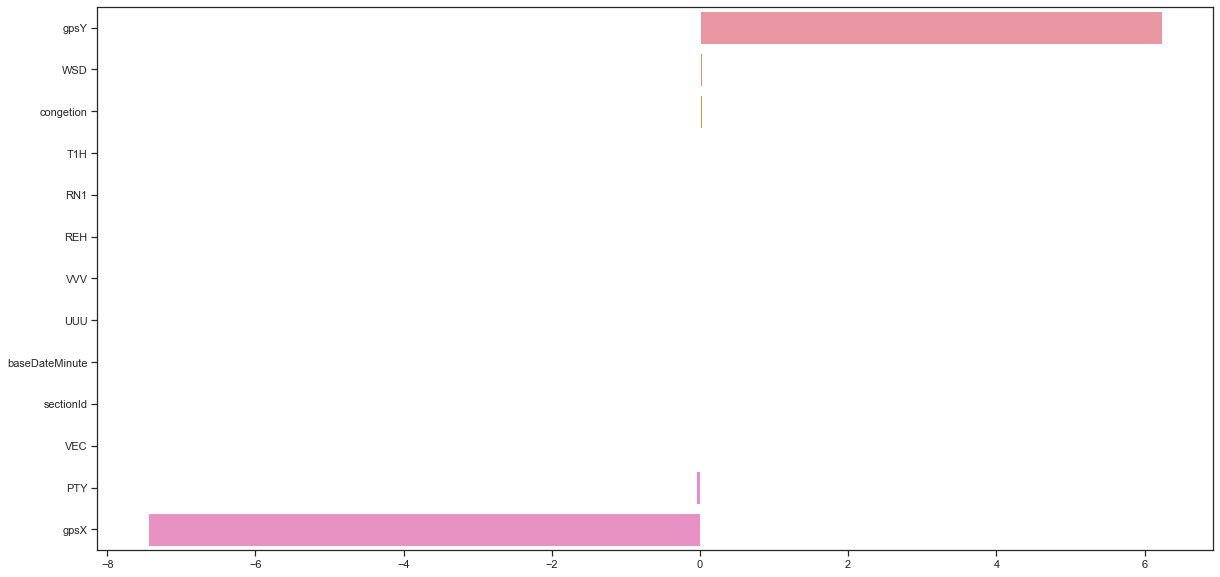

In [204]:
coef = pd.Series(lr_reg.coef_, index=df_X.columns)
coef_sort = coef.sort_values(ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(x=coef_sort.values, y=coef_sort.index)


# plt.figure를 안했을 때는 다른 회귀계수가 값이 작아 보이지않는다.

### 파이썬 머신러닝 완벽가이드 350p
#### 사이킷런은 카테고리만을 위한 데이터 타입이 없으며, 모두 숫자로 변환해야 한다.
#### 숫자형 카테고리 값을 선형회귀에 사용할 경우 회귀 계수를 연산할 때,
#### 이 숫자형 값에 크게 영향을 받는 경우가 발생하므로 , 이러한 피처는 원-핫 인코딩을 통해 변환해야 한다.

## 원 핫 인코딩 작업

In [205]:
df_X.columns

Index(['baseDateMinute', 'sectionId', 'PTY', 'REH', 'RN1', 'T1H', 'UUU', 'VEC',
       'VVV', 'WSD', 'congetion', 'gpsX', 'gpsY'],
      dtype='object')

## OneHot Encoding

In [206]:
X_features_ohe = pd.get_dummies(df_X, columns=['baseDateMinute', 'PTY', 'REH', 'RN1', 'T1H', 'UUU', 'VEC',
       'VVV', 'WSD', 'congetion'])

In [207]:
X_features_ohe.isnull().sum()

sectionId             0
gpsX                  0
gpsY                  0
baseDateMinute_838    0
baseDateMinute_839    0
                     ..
WSD_4.3               0
WSD_4.9               0
congetion_3           0
congetion_4           0
congetion_5           0
Length: 954, dtype: int64

In [208]:
# X_features_ohe.fillna(0,inplace=True)

In [209]:
# y_log_transform.fillna(0,inplace=True)

In [210]:
# 원-핫 인코딩이 적용된 feature 데이터 세트 기반으로 학습/예측 데이터 분할. 
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_log_transform,
                                                    test_size=0.3, random_state=0)

# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
# end of function get_model_predict    

# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

### LinearRegression ###
RMSLE: 0.307, RMSE: 1.421, MAE: 1.020
### Ridge ###
RMSLE: 0.327, RMSE: 1.640, MAE: 1.132
### Lasso ###
RMSLE: 0.353, RMSE: 1.800, MAE: 1.193


C:\Users\cityo\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.154e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


<AxesSubplot:>

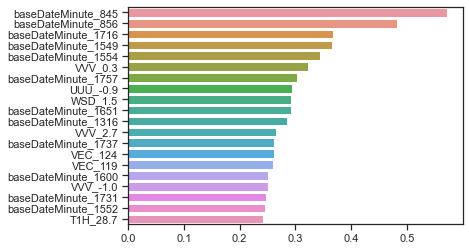

In [211]:
coef = pd.Series(lr_reg.coef_ , index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values , y=coef_sort.index)

In [212]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    # XGBoost의 경우 DataFrame이 입력 될 경우 버전에 따라 오류 발생 가능. ndarray로 변환.
    get_model_predict(model,X_train.values, X_test.values, y_train.values, y_test.values,is_expm1=True)

### RandomForestRegressor ###
RMSLE: 0.209, RMSE: 0.903, MAE: 0.647
### GradientBoostingRegressor ###
RMSLE: 0.221, RMSE: 0.989, MAE: 0.717
### XGBRegressor ###
RMSLE: 0.224, RMSE: 1.000, MAE: 0.721
### LGBMRegressor ###
RMSLE: 0.209, RMSE: 0.898, MAE: 0.670
